# Overview


We will kick things off with an **in class** lecture on few more administrative things
* Groups
* The large-scale structure of the class
   * Networks and NLP
   * Exercises versus Assignments
   * The final project
* Other stuff (when lectures will be posted, etc)

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend showing up in class!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

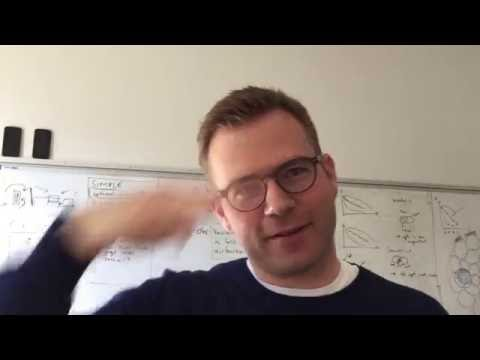

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo("MMziC5xktHs",width=800, height=450) 
# Or use https://www.youtube.com/watch?v=MMziC5xktHs if the video isn't displaying

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can find the whole 
> thing for free [**here**](http://networksciencebook.com). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
>
> * One example of a very connected network could be the social network of a small Greek island. Here many nodes (people) will be connected to all the other people they know (links) but most likely there is someone that is not known or has fewer social interactions. For example a kid might not know / have ever talked to one of the older person in the island so the network remains sparse.

<div class="alert alert-block alert-info">
Just as last week, you might be tempted to use an LLM to come up with your answer. Don't! Remember what I said about the *illusion of knowledge* that you get when you take shortcuts. Don't fall into the trap. Think! Write down your own thoughts. And when you're done, you can use an LLM to make the answers better.
</div>


# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book **using `NetworkX`**

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it. One more thing on that last sub-exercise: It's easier to solve if you don't use `NetworkX`, but simple pen and paper).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-block diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).

<div class="alert alert-block alert-info">
The "no-LLM" idea also applies here. The idea is to try to use NetworkX to solve some problems. Give it a shot on your own. You can ask your LLM for hints if you get stuck. But don't ask for the answer. Find it yourself 😎
</div>

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

Graph 1 has 2 nodes with odd degree: [1, 3]
Graph 2 has 4 nodes with odd degree: [1, 2, 5, 4]
Graph 2 cannot be drawn without lifting the pen or retracing edges
Graph 3 has 0 nodes with odd degree: []
Graph 4 has 2 nodes with odd degree: [5, 6]


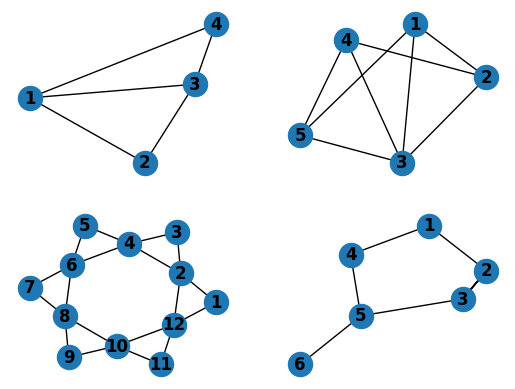

In [14]:
# Exercise 2.1 Königsberg Problem
graphs = []
graphA, graphB, graphC, graphD = nx.Graph(), nx.Graph(), nx.Graph(), nx.MultiGraph()
graphA.add_edges_from([(1,2), (1,3), (1,4), (2,3), (3,4)])
graphB.add_edges_from([(1,2), (1,3), (1,5), (2,4), (3, 4), (5,4), (3,2), (3,5)])
graphC.add_edges_from([(1,2),(1,12),(2,3),(3,4),(4,2),(4,5),(4,6),(5,6)
                       ,(6,7),(6,8),(7,8),(8,9),(8,10),(9,10),(10,11),
                       (10,12),(11,12),(12,2)])
graphD.add_edges_from([(1,2), (1,4), (2,3), (2,3), (2,3), (2,3), (2,3), (4,5), (3,5), (5, 6)])
graphs.append(graphA)
graphs.append(graphB)
graphs.append(graphC)
graphs.append(graphD)
# Plotting 
subax1 = plt.subplot(221)
nx.draw(graphA, ax=subax1, with_labels=True, font_weight='bold')
subax2 = plt.subplot(222)
nx.draw(graphB, ax=subax2, with_labels=True, font_weight='bold')
subax3 = plt.subplot(223)
nx.draw(graphC, ax=subax3, with_labels=True, font_weight='bold')
subax4 = plt.subplot(224)
nx.draw(graphD, ax=subax4, with_labels=True, font_weight='bold')

for i, g in enumerate(graphs):
    odd_deg_nodes = [v for v, d in g.degree() if not d % 2 == 0]
    print(f"Graph {i+1} has {len(odd_deg_nodes)} nodes with odd degree: {odd_deg_nodes}")
    if len(odd_deg_nodes) > 2:
        print(f"Graph {i+1} cannot be drawn without lifting the pen or retracing edges")


The average clustering coefficient of graph A is 0.6388888888888888
The average clustering coefficient of graph A calculated manually is 0.6388888888888888


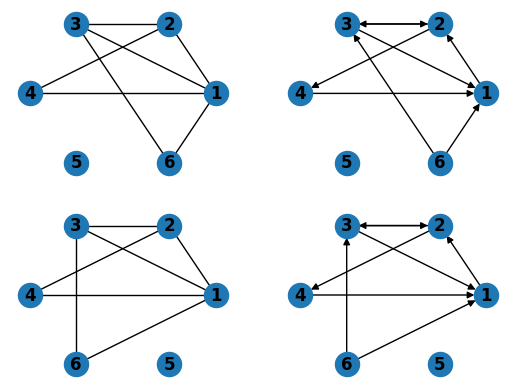

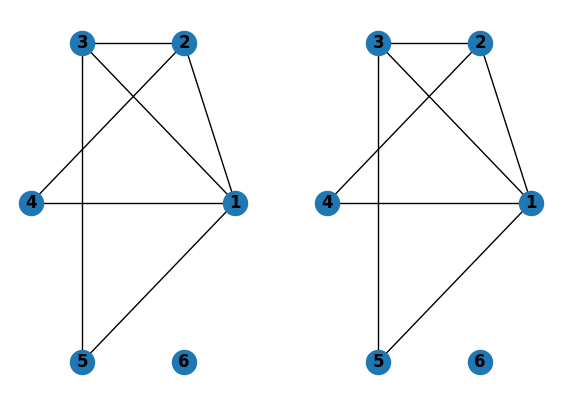

All paths from node 1 to node 3 in network A allowing repeats: [[1, 2, 1, 3], [1, 3, 1, 3], [1, 3, 2, 3], [1, 3, 6, 3], [1, 4, 1, 3], [1, 4, 2, 3], [1, 6, 1, 3]]
All paths from node 1 to node 3 in network B allowing repeats: []


In [15]:
# Exercise 2.3 Graph representation
adjMatrixA = np.array([[0,1,1,1,0,1],
              [1,0,1,1,0,0],
              [1,1,0,0,0,1],
              [1,1,0,0,0,0],
              [0,0,0,0,0,0],
              [1,0,1,0,0,0]])
adjMatrixB = np.array([[0,1,0,0,0,0],
              [0,0,1,1,0,0],
              [1,1,0,0,0,0],
              [1,0,0,0,0,0],
              [0,0,0,0,0,0],
              [1,0,1,0,0,0]])
linkListA = [(1,2),(1,3),(1,4),(1,6),(2,3),(2,4),(3,6)]
linkListB = [(1,2),(2,3),(2,4),(3,2),(3,1),(4,1),(6,1), (6,3)]

graphA_fromMatrix = nx.from_numpy_array(adjMatrixA, create_using=nx.Graph)
graphB_fromMatrix = nx.from_numpy_array(adjMatrixB, create_using=nx.DiGraph)
graphA_fromList = nx.Graph()
graphB_fromList = nx.DiGraph()
graphA_fromList.add_edges_from(linkListA)
graphA_fromList.add_nodes_from([1,2,3,4,5,6])
graphB_fromList.add_edges_from(linkListB)
graphB_fromList.add_nodes_from([1,2,3,4,5,6])

# Relabel nodes to start from 1 instead of 0
graphA_fromMatrix = nx.relabel_nodes(graphA_fromMatrix, {i: i+1 for i in range(len(adjMatrixA))})
graphB_fromMatrix = nx.relabel_nodes(graphB_fromMatrix, {i: i+1 for i in range(len(adjMatrixB))})

# Plotting
subax1 = plt.subplot(221)
nx.draw_circular(graphA_fromMatrix, ax=subax1, with_labels=True, font_weight='bold')
subax2 = plt.subplot(222)
nx.draw_circular(graphB_fromMatrix, ax=subax2, with_labels=True, font_weight='bold')
subax3 = plt.subplot(223)
nx.draw_circular(graphA_fromList, ax=subax3, with_labels=True, font_weight='bold')
subax4 = plt.subplot(224)
nx.draw_circular(graphB_fromList, ax=subax4, with_labels=True, font_weight='bold')

# The average clustering coefficient of graph A is found by
avg_clustering_A = nx.average_clustering(graphA_fromMatrix)
print(f"The average clustering coefficient of graph A is {avg_clustering_A}")
def clustering_coefficient(graph):
    clustering_coeffs = []
    for node in graph.nodes():
        neighbors = list(graph.neighbors(node))
        k = len(neighbors)
        if k < 2:
            clustering_coeffs.append(0.0)
            continue
        links = 0
        for i in range(k):
            for j in range(i + 1, k):
                if graph.has_edge(neighbors[i], neighbors[j]):
                    links += 1
        clustering_coeff = (2 * links) / (k * (k - 1))
        clustering_coeffs.append(clustering_coeff)
    return sum(clustering_coeffs) / len(clustering_coeffs)
print(f"The average clustering coefficient of graph A calculated manually is {clustering_coefficient(graphA_fromMatrix)}")

# If the labes of nodes 5 and 6 the adjacency matrix becomes
adjMatrixA_switched = np.array([[0,1,1,1,1,0],
              [1,0,1,1,0,0],
              [1,1,0,0,1,0],
              [1,1,0,0,0,0],
              [1,0,1,0,0,0],
              [0,0,0,0,0,0]])
# Swithcing the last two rows and columns
graphA_switched = nx.from_numpy_array(adjMatrixA_switched, create_using=nx.Graph)
graphA_switched = nx.relabel_nodes(graphA_switched, {i: i+1 for i in range(len(adjMatrixA_switched))})

# the adjacency list becomes
linkListA_switched = [(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(3,5)] # Changing (1,6) to (1,5) and (3,6) to (3,5)
graphA_switched_list = nx.Graph()
graphA_switched_list.add_edges_from(linkListA_switched)
graphA_switched_list.add_nodes_from([1,2,3,4,5,6])

# Plotting
plt.figure(figsize=(7,5))
subax5 = plt.subplot(121)
nx.draw_circular(graphA_switched, ax=subax5, with_labels=True, font_weight='bold')
subax6 = plt.subplot(122)
nx.draw_circular(graphA_switched_list, ax=subax6, with_labels=True, font_weight='bold')
plt.show()

# From the linked list representation I can not infer the number of nodes that have no connections (degree 0) 
# while from the adjacency matrix I can see that node 5 (or 6) has no connections (the 5th row and column are all 0s)

# To find the possible paths from node 1 to node 3 with possible repetition of nodes and links for network A and B:
def find_all_paths(graph, start, end, cutoff):
    q = [(start, [start])]
    paths = []
    while q:
        (vertex, path) = q.pop(0)
        if len(path) > cutoff:
            continue
        for next_node in graph[vertex]:
            new_path = list(path)
            new_path.append(next_node)
            if next_node == end:
                paths.append(new_path)
            q.append((next_node, new_path))
    return [p for p in paths if len(p) == cutoff + 1]


all_paths_with_repeats_A = find_all_paths(graphA_fromMatrix, 1, 3, cutoff=3)
print(f"All paths from node 1 to node 3 in network A allowing repeats: {all_paths_with_repeats_A}")
all_paths_with_repeats_B = find_all_paths(graphB_fromMatrix, 1, 3, cutoff=3)
print(f"All paths from node 1 to node 3 in network B allowing repeats: {all_paths_with_repeats_B}")

Adjacency matrix for the green projection:
 [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
Adjacency matrix for the purple projection:
 [[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]
Average degree of purple nodes: 1.6666666666666667 in the bipartite network
Average degree of green nodes: 2.0 in the bipartite network
Average degree of green nodes: 2.0 in the green projection
Average degree of purple nodes: 2.6666666666666665 in the purple projection


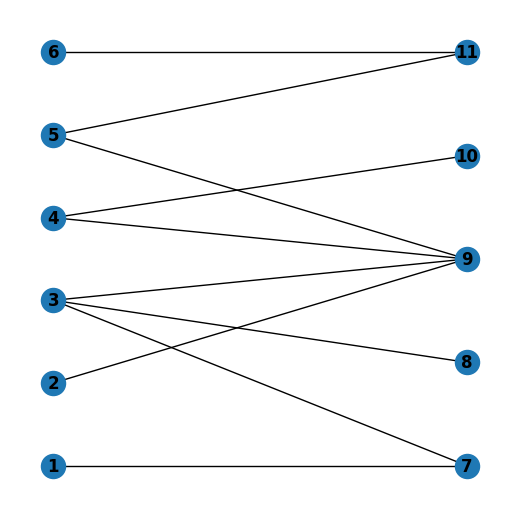

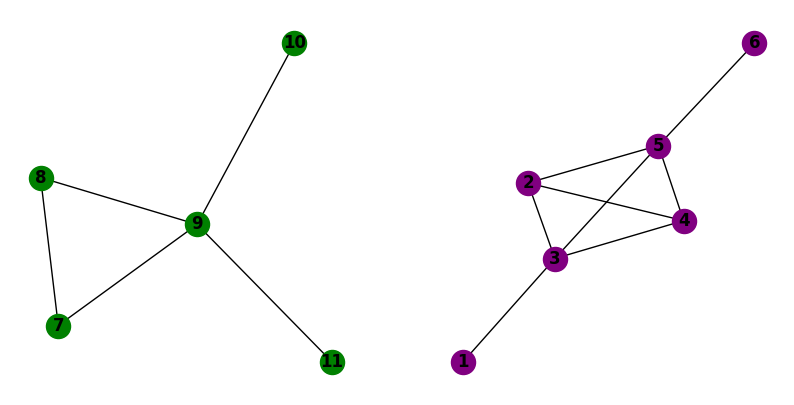

In [16]:
# Exercise 2.5 Bipartite networks   
adjMatrixBipartite = np.array([[0,0,0,0,0,0,1,0,0,0,0],
                               [0,0,0,0,0,0,0,0,1,0,0],
                               [0,0,0,0,0,0,1,1,1,0,0],
                               [0,0,0,0,0,0,0,0,1,1,0],
                               [0,0,0,0,0,0,0,0,1,0,1],
                               [0,0,0,0,0,0,0,0,0,0,1],
                               [1,0,1,0,0,0,0,0,0,0,0],
                               [0,0,1,0,0,0,0,0,0,0,0],
                               [0,1,1,1,1,0,0,0,0,0,0],
                               [0,0,0,1,0,0,0,0,0,0,0],
                               [0,0,0,0,1,1,0,0,0,0,0]])
graphBipartite = nx.from_numpy_array(adjMatrixBipartite, create_using=nx.Graph)
graphBipartite = nx.relabel_nodes(graphBipartite, {i: i+1 for i in range(len(adjMatrixBipartite))})
# This is an anti block diagonal matrix because there are no connections within the two sets of nodes, only between them
# Plotting
plt.figure(figsize=(5,5))
nx.draw_bipartite(graphBipartite, with_labels=True, font_weight='bold')

# Find the ajcency matrix for the two projections of the bipartite network
purple = [1,2,3,4,5,6]
green = [7,8,9,10,11]
projection_green= nx.bipartite.projected_graph(graphBipartite, green)
projection_purple= nx.bipartite.projected_graph(graphBipartite, purple)
adjMatrixGreen = nx.adjacency_matrix(projection_green)
adjMatrixPurple = nx.adjacency_matrix(projection_purple)
print("Adjacency matrix for the green projection:\n", adjMatrixGreen.todense())
print("Adjacency matrix for the purple projection:\n", adjMatrixPurple.todense())

# Plotting the projections
plt.figure(figsize=(10,5))
subax1 = plt.subplot(121)
nx.draw(projection_green, ax=subax1, with_labels=True, font_weight='bold', node_color='green')
subax2 = plt.subplot(122)
nx.draw(projection_purple, ax=subax2, with_labels=True, font_weight='bold', node_color='purple')

# Average degree of purple and green nodes in the bipartite network
degrees = dict(graphBipartite.degree())
purple_degrees = [degrees[node] for node in purple]
green_degrees = [degrees[node] for node in green]
avg_degree_purple = sum(purple_degrees) / len(purple_degrees)
avg_degree_green = sum(green_degrees) / len(green_degrees)
print(f"Average degree of purple nodes: {avg_degree_purple} in the bipartite network")
print(f"Average degree of green nodes: {avg_degree_green} in the bipartite network")

# Average degree in the projections
degrees_green_proj = dict(projection_green.degree())
degrees_purple_proj = dict(projection_purple.degree())
avg_degree_green_proj = sum(degrees_green_proj.values()) / len(degrees_green_proj)
avg_degree_purple_proj = sum(degrees_purple_proj.values()) / len(degrees_purple_proj)
print(f"Average degree of green nodes: {avg_degree_green_proj} in the green projection")
print(f"Average degree of purple nodes: {avg_degree_purple_proj} in the purple projection")

# It is not surprising that the results are different because in the bipartite network the degree counts the number of connections to the other set of nodes
# while in the projections the degree counts the number of connections within the same set of nodes

> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

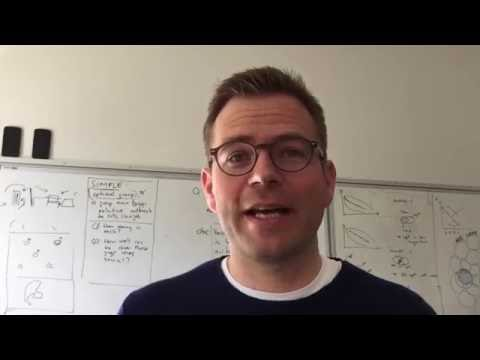

In [17]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450) 
# https://www.youtube.com/watch?v=iDlb9On_TDQ

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.

<div class="alert alert-block alert-info">
As I hint right above, this exercise is about you discovering nuances of binning: How defining bins that fit the data is important. How the first and last bin can sometimes be tricky. You won't discover that if you get help, so again I encourage you to try it all on your own.
</div>
**And don't just use the built-in binning functions. That misses the point. Instead follow the exercise carefully**. 

> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

In [18]:
import random

(array([  19.,  113.,  443., 1019., 1441., 1169.,  574.,  176.,   39.,
           7.]),
 array([1.58524376, 1.67439553, 1.76354729, 1.85269905, 1.94185081,
        2.03100257, 2.12015433, 2.20930609, 2.29845785, 2.38760962,
        2.47676138]),
 <BarContainer object of 10 artists>)

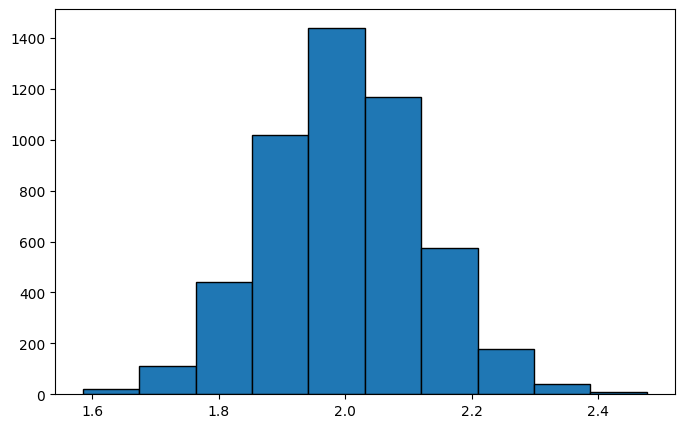

In [19]:
# Binning real numbers
points = [random.gauss(mu=2, sigma=0.125) for _ in range(5000)]
hist, bin_edges = np.histogram(points, bins=10) # bin edges is len(hist)+1

# If you want to use plt.plot you need to calculate the center of each bin
# Calculate the center of each bin
# bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plotting the histogram
plt.figure(figsize=(8,5))
plt.hist(points, bins=bin_edges, edgecolor='black')
# plt.plot(bin_centers, hist, marker='o', linestyle='-')
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Binned Data Plotted with plt.plot")

The maximum integer is: 26
The minimum integer is: 2
The sum over the bin counts is: 4999
The number of bins is: 23
The number of bin edges is: 24


<BarContainer object of 23 artists>

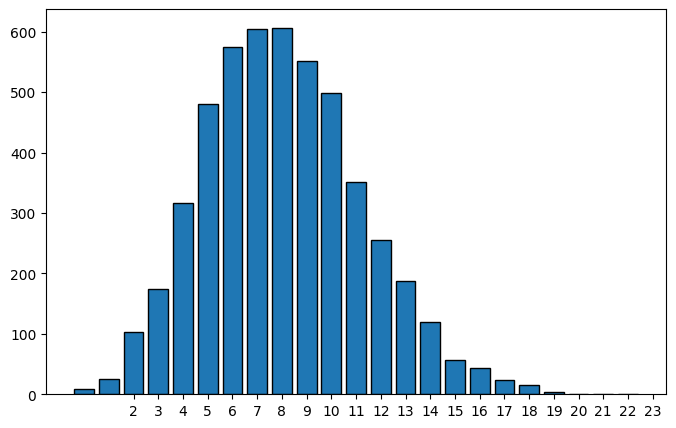

In [20]:
# Binning integers
integers = np.random.poisson(lam=10, size=5000)
print("The maximum integer is:", max(integers))
print("The minimum integer is:", min(integers))

v = np.arange(min(integers), max(integers))
hist, bin_edges = np.histogram(integers, bins=v)
# Sum over bin counts
sum_hist = sum(hist)
print("The sum over the bin counts is:", sum_hist)

# For the same reason bin_edges and hist have different lengths
print("The number of bins is:", len(hist))
print("The number of bin edges is:", len(bin_edges))

# Plotting 
plt.figure(figsize=(8,5))
plt.xticks(v)
plt.bar([x for x in range(len(hist))], hist, edgecolor='black')

The value of p is: 0.002000400080016003


Text(0, 0.5, 'Number of Nodes')

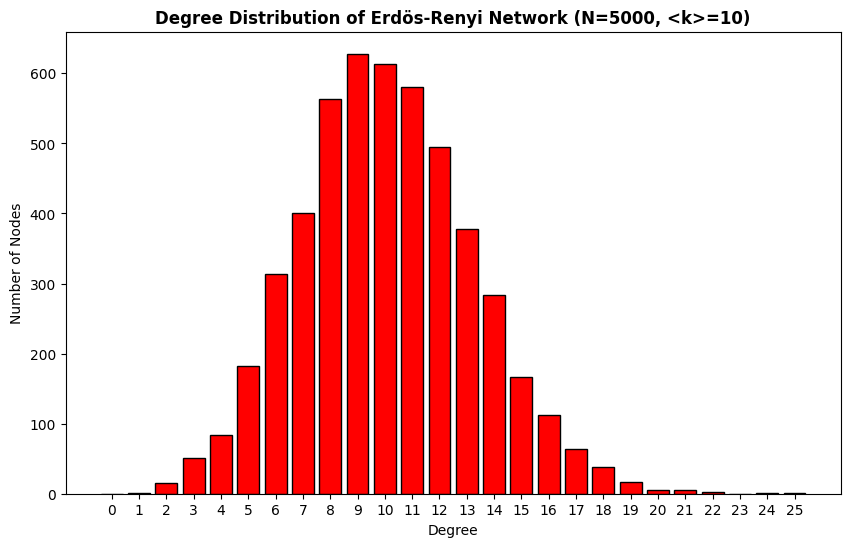

In [21]:
p=10/(5000-1)
print("The value of p is:", p)

Erdos_Renyi = nx.erdos_renyi_graph(5000, p)

# Extract the degree distribution
# nx.degree_histogram creates a list where the value at each index is the count of nodes with that degree
degree_counts = nx.degree_histogram(Erdos_Renyi)
degrees = range(len(degree_counts))

# Plotting the degree distribution
plt.figure(figsize=(10, 6))
plt.xticks(degrees)
plt.bar(degrees, degree_counts, color='red', edgecolor='black')
plt.title("Degree Distribution of Erdös-Renyi Network (N=5000, <k>=10)", fontweight='bold')
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

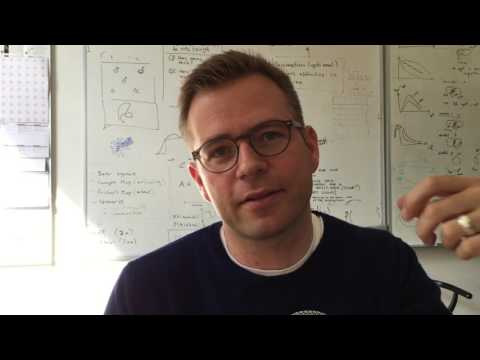

In [22]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450) 
# https://www.youtube.com/watch?v=c_SbQCzgqb0

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

<div class="alert alert-block alert-info">
For this exercise, I think you should solve the technical parts on your own (see above for reasons), but it's totally OK to use your LLM to make the plot look better!
</div>

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

### Exercise 3.1 Erdős-Rényi Networks
Given a Erdős-Rényi network with N = 3000 and p = $10^{-3}$ find the following.
    
- The expected number of links $<L>$ is found by:
$$ <L>= p \frac{N(N-1)}{2} = 4498.5 $$

- The network is in the supercritical regime because $<k>$ > 1 as it can be seen computing the value of $<k>$:
$$ <k> = p(N-1) = 2.999 $$

- The probability $p_c$ that the network is at the critical point is:
$$ p_c = \frac{1}{N-1} \approx \frac{1}{N} = 0.00033344 $$

- Given the linking probability $p=10^{-3}$ calculate the number of nodes $N^{cr}$ so that the network has only one component. This happens in the connected regime and can be calculated using the inverse formula:
$$ p > \frac{\ln(N)}{N} \rightarrow N^{cr} = 9119 $$

- For the network in the previous question calcualte the average degree $<k^{cr}>$ and the average distance between two randomly chosen nodes $<d>$. This is done following the two formulas:
$$ <k^{cr}> = p(N-1) =  9.118 $$
$$ <d> = \frac{ln(N)}{ln(<k>)} = 4.125376514 $$

- To calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution) we can use the formula:
$$ p_k = e^{-<k>} \frac{<k>^k}{k!}$$
and iterate over k.

n for one component  9119
K for one component  9.118


Text(0, 0.5, 'p(k)')

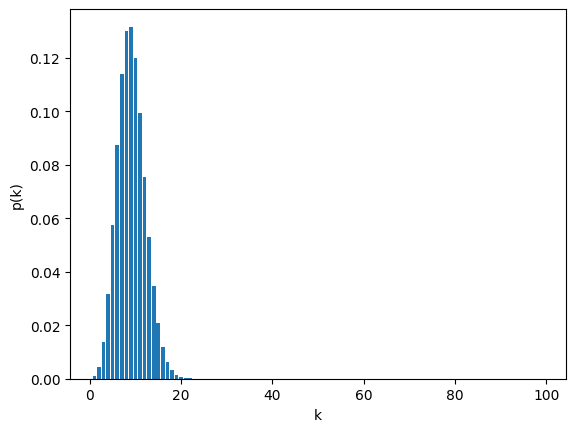

In [23]:
import math

p = 10**(-3)
n_cr = 9119
print("n for one component ", n_cr)
k_cr = p*(n_cr-1)
print("K for one component ", k_cr)

dist = {}
for k in range(1, 100):
    num = k_cr**k
    den = math.factorial(k)
    dist.update({k: math.exp(-k_cr)*num/den})

plt.bar(dist.keys(),dist.values())
plt.xlabel("k")
plt.ylabel("p(k)")

> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 


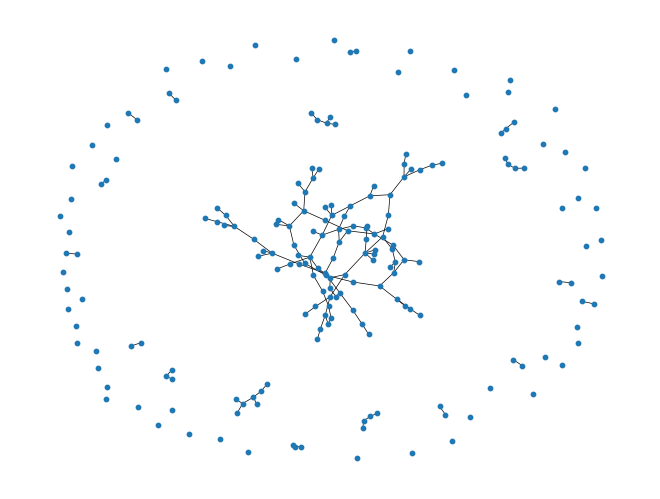

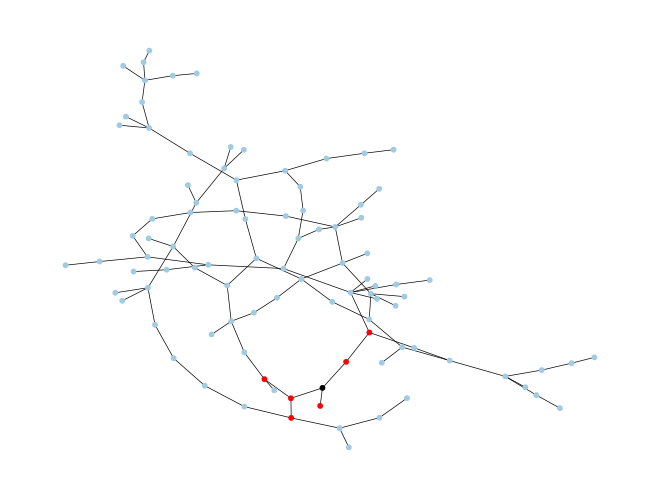

In [28]:
# Plot the network
N = 200 
k = 1.5
p = k/(N-1)
graph = nx.erdos_renyi_graph(N, p)
nx.draw(graph, node_size=10, with_labels=False, width=0.5)
plt.show()

# Extract the Giant Connected Component (GCC)
gcc = max(nx.connected_components(graph), key=len)

# Choose a node at random from the GCC
node = random.choice(list(gcc))

# Find all nodes that are precisely 2 steps away from that node
nodes = set(nx.single_source_shortest_path_length(graph, node, cutoff=2).keys())

# Plot the GCC with specific colors
colors = ["#000000" if n == node else "#ff0000" if n in nodes else "#A0CBE2" for n in gcc]
nx.draw(nx.subgraph(graph, gcc), node_size=10, with_labels=False, width=0.5, node_color=colors)
plt.show()
